# Tugas Besar 2A - Pembelajaran Mesin


#### Anggota Kelompok
1. Ahmad Mutawalli - 13517026, K02
2. Harry Rahmadi Munly - 13517033, K03
3. Ardysatrio Fakhri Haroen - 13517062, K02
4. Dandi Agus Maulana - 13517077, K02

## Import Dependencies

In [64]:
import sys
import random
import copy
import time
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.metrics import fowlkes_mallows_score,silhouette_score 
from sklearn import decomposition

## Implementasi modul K-means

In [65]:
class Kmeans():
    def __init__(self, cluster=4, max_iter=10):
        self.cluster = cluster
        self.max_iter = max_iter
        self.stop_iter = 0
        self.num_data = 0
        self.num_feature = 0
        self.kmeans_centroids = []
    
    # Init centroids
    def init_centroid(self, data):
        self.num_data, self.num_feature = np.shape(data)
        centroids = np.zeros((self.cluster, self.num_feature))
        for i in range(self.cluster):
            centroid = data[np.random.choice(range(self.num_data))]
            centroids[i] = centroid
        return centroids

    #calculate euclidean distance
    def euclidean_distance (self, p1, p2):
        sum_square = 0
        for i in range(0, len(p1)):
            sum_square += math.pow(float(p1[i]) - float(p2[i]), 2)
        return float(math.sqrt(sum_square))
    

    # get closer centroid from a point
    def get_closest_centroid(self, point, centroids):
        index = -1
        min_dist = 999999.0
        for i, centroid in enumerate(centroids):
            distance = self.euclidean_distance(point, centroid)
            if distance < min_dist:
                index = i
                min_dist = distance
        return index

    def assign_cluster(self, centroids, data):
        clusters = [[] for i in range(self.cluster)]
        for idx, value in enumerate(data):
            closest_centroid = self.get_closest_centroid(value, centroids)
            clusters[closest_centroid].append(idx)
        return clusters

    # make new centroids with the means of data in each cluster
    def make_new_centroids(self, clusters, data):
        centroids = np.zeros((self.cluster, self.num_feature))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(data[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    # get label of data
    def get_cluster_labels(self, clusters, data):
        label = np.zeros(np.shape(data)[0])
        for idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                label[sample_idx] = idx
        return label

    def check_change(self, data1, data2):
        change = False
        for i in range (len(data1)):
            if(not change):
                for j in range(len(data1[i])):
                    if (data1[i][j] != data2[i][j]):
                        change = True
                        break
        return change
    
    # run k-means clustering and return the centroids of the clusters
    def fit(self, data):
        # Init centroids
        centroids = self.init_centroid(data)

        # Iterate until convergence or reach max iter
        for i in range(self.max_iter):
            # Assign data to closest centroids (create clusters)
            clusters = self.assign_cluster(centroids, data)
            prev_centroids = centroids
            
            # Update centroids
            centroids = self.make_new_centroids(clusters, data)

            # break if no change 
            if (not self.check_change(prev_centroids, centroids)):
                self.stop_iter = i
                break

        self.kmeans_centroids = centroids
        return centroids

    # Predict the class of each sample
    def predict(self, data):
        
        clusters = self.assign_cluster(self.kmeans_centroids, data)

        predicted_labels = self.get_cluster_labels(clusters, data)

        return predicted_labels


## Clustering with K-means

### Eksperimen 1

In [66]:
#Load dataset iris
X_iris, y_iris = load_iris(return_X_y=True)
iris_data = pd.DataFrame(X_iris, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']); iris_data['label'] = y_iris
print(iris_data)

train_data = np.array(X_iris)
train_labels = np.array(y_iris)
num_features = train_data.data.shape[1]
unique_labels = np.unique(train_labels)
num_classes = len(unique_labels)

     sepal_length  sepal_width  petal_length  petal_width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
5             5.4          3.9           1.7          0.4      0
6             4.6          3.4           1.4          0.3      0
7             5.0          3.4           1.5          0.2      0
8             4.4          2.9           1.4          0.2      0
9             4.9          3.1           1.5          0.1      0
10            5.4          3.7           1.5          0.2      0
11            4.8          3.4           1.6          0.2      0
12            4.8          3.0           1.4          0.1      0
13            4.3          3.0           1.1          0.1      0
14            5.8        

In [67]:
kmean = Kmeans(cluster=num_classes, max_iter=1000)
print("Centroid :")
centroids = kmean.fit(train_data)
print(centroids)

print()
print("stop at iter : " + str(kmean.stop_iter))

print()
print("Predicted label :")
predicted_labels = kmean.predict(train_data)
print(predicted_labels)

# Calculate accuracy
Correct = 0
for index in range(len(train_labels)):
    current_label = train_labels[index]
    predicted_label = predicted_labels[index]
    if current_label == predicted_label:
        Correct += 1

Accuracy = Correct / len(train_labels)

print()
print("K-Means accuracy = ", Accuracy)

Centroid :
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]

stop at iter : 3

Predicted label :
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2.
 0. 2. 0. 2. 0. 0. 2. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0.
 0. 0. 2. 0. 0. 2.]

K-Means accuracy =  0.09333333333333334


#### Evaluation Eksperimen 1

In [68]:
print("Fowlkes-Mallows Score : ",fowlkes_mallows_score(train_labels,predicted_labels))

Fowlkes-Mallows Score :  0.8208080729114153


In [69]:
print("Silhouette Score : ",silhouette_score(train_data,predicted_labels))

Silhouette Score :  0.5528190123564091


### Eksperimen 2

In [70]:
kmean = Kmeans(cluster=num_classes, max_iter=1000)
print("Centroid :")
centroids = kmean.fit(train_data)
print(centroids)

print()
print("stop at iter : " + str(kmean.stop_iter))

print()
print("Predicted label :")
predicted_labels = kmean.predict(train_data)
print(predicted_labels)

# Calculate accuracy
Correct = 0
for index in range(len(train_labels)):
    current_label = train_labels[index]
    predicted_label = predicted_labels[index]
    if current_label == predicted_label:
        Correct += 1

Accuracy = Correct / len(train_labels)

print()
print("K-Means accuracy = ", Accuracy)

Centroid :
[[5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]

stop at iter : 6

Predicted label :
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 1.]

K-Means accuracy =  0.8866666666666667


#### Evaluation Eksperimen 2

In [71]:
print("Fowlkes-Mallows Score : ",fowlkes_mallows_score(train_labels,predicted_labels))

Fowlkes-Mallows Score :  0.8112427991975698


In [72]:
print("Silhouette Score : ",silhouette_score(train_data,predicted_labels))

Silhouette Score :  0.5511916046195916


## Visualization

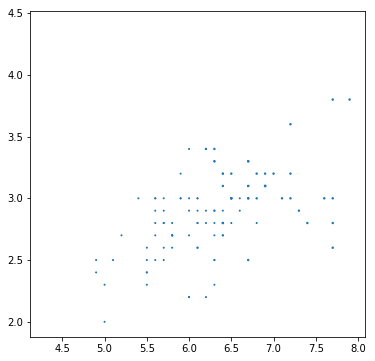

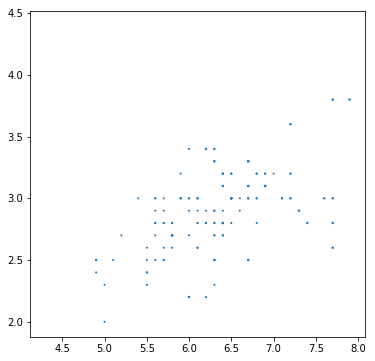

In [73]:
plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_length'],iris_data['sepal_width'],predicted_labels, cmap ='rainbow')
plt.show()

plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_length'],iris_data['sepal_width'],train_labels, cmap ='rainbow')
plt.show()

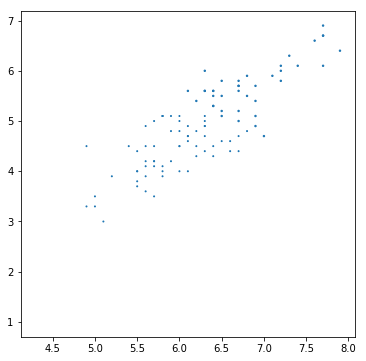

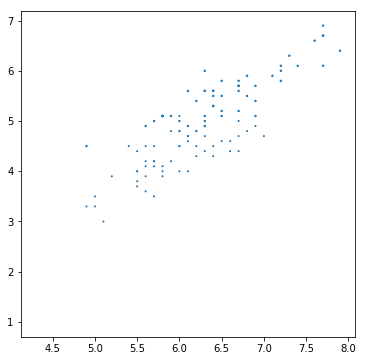

In [74]:
plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_length'],iris_data['petal_length'],predicted_labels, cmap ='rainbow')
plt.show()

plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_length'],iris_data['petal_length'],train_labels, cmap ='rainbow')
plt.show()

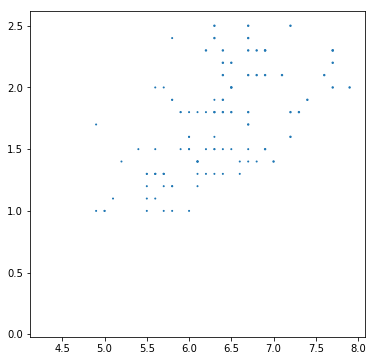

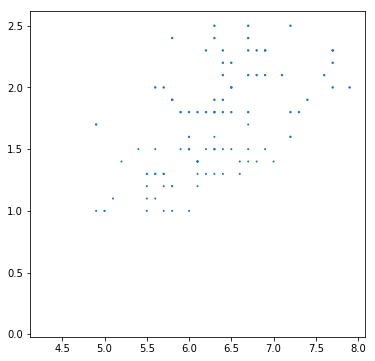

In [75]:
plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_length'],iris_data['petal_width'],predicted_labels, cmap ='rainbow')
plt.show()

plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_length'],iris_data['petal_width'],train_labels, cmap ='rainbow')
plt.show()

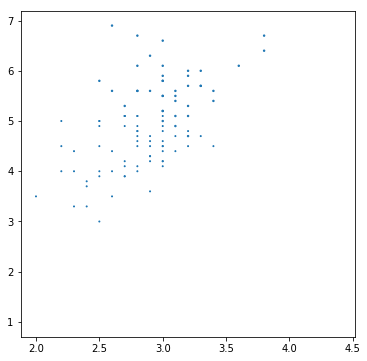

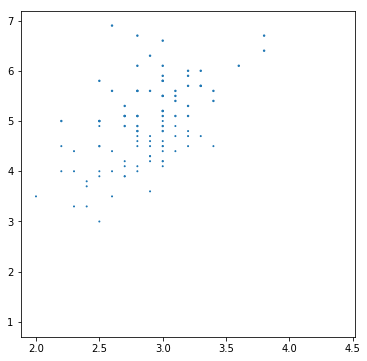

In [76]:
plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_width'],iris_data['petal_length'],predicted_labels, cmap ='rainbow')
plt.show()

plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_width'],iris_data['petal_length'],train_labels, cmap ='rainbow')
plt.show()

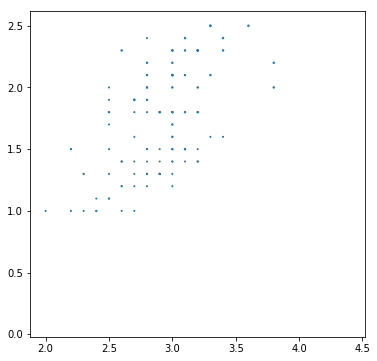

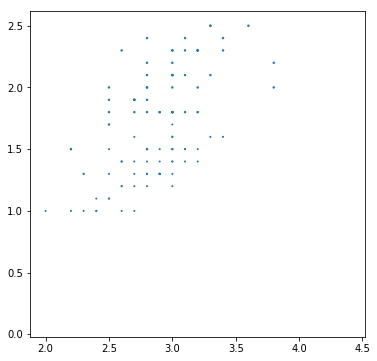

In [77]:
plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_width'],iris_data['petal_width'],predicted_labels, cmap ='rainbow')
plt.show()

plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['sepal_width'],iris_data['petal_width'],train_labels, cmap ='rainbow')
plt.show()

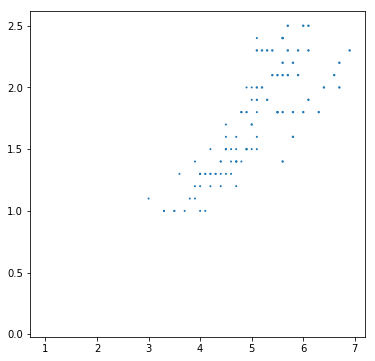

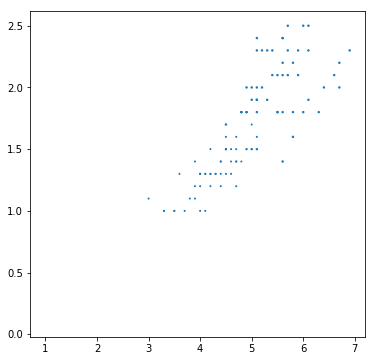

In [78]:
plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['petal_length'],iris_data['petal_width'],predicted_labels, cmap ='rainbow')
plt.show()

plt.figure(figsize =(6, 6)) 
plt.scatter(iris_data['petal_length'],iris_data['petal_width'],train_labels, cmap ='rainbow')
plt.show()

## Analysis

Pada bagian ini, kami melakukan eksperimen sebanyak 2 kali. Dapat dilihat hasil evaluasi pada eksperimen pertama dan kedua menggunakan Fowlkes-Mallows maupun Silhouette Coefficient berbeda karena centroid yang didapatkan pada training menggunakan algoritma Kmeans juga berbeda.

Hasil evaluasi menggunakan algoritma Kmeans dipengaruhi oleh penentuan centroid pada awal training. Karena pada implementasi ini penentuan centroid awal menggunakan random (fungsi init_centroid) maka hasil training pun akan sangat beragam. Apabila random centroid awal mendapatkan angka random yang baik maka penentuan kluster oleh algoritma Kmeans juga baik dan begitu pula sebaliknya.